In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"].unique() #gammas or hedrons

array(['g', 'h'], dtype=object)

PREPARING THE DATA

In [4]:
#Computer is not good with letters, it's good with numbers. So here we will convert class values into numbers.
df["class"] = (df["class"] == 'g').astype(int)

In [5]:
df["class"].unique()

array([1, 0])

In [6]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

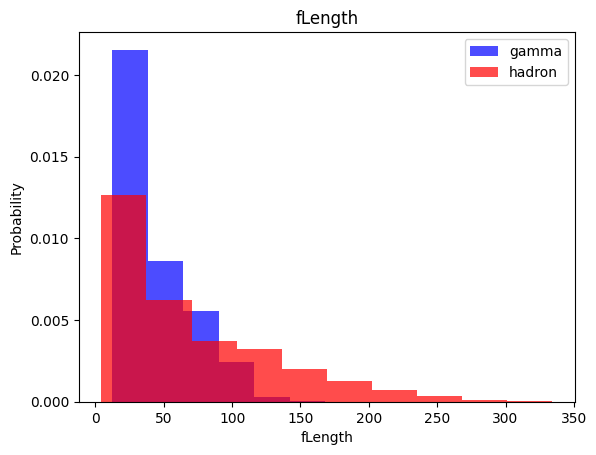

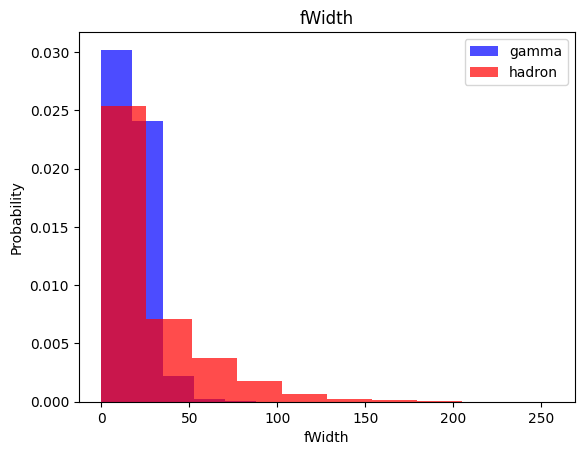

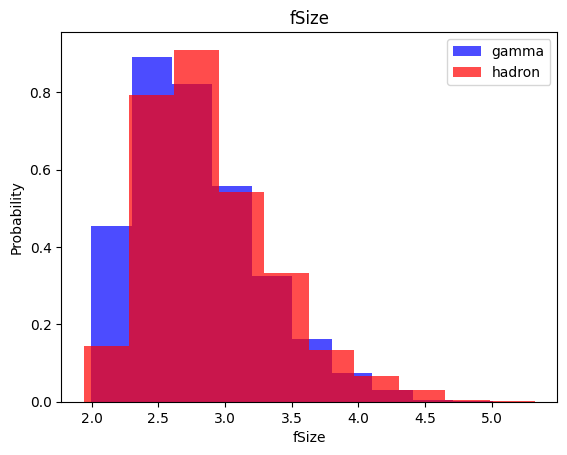

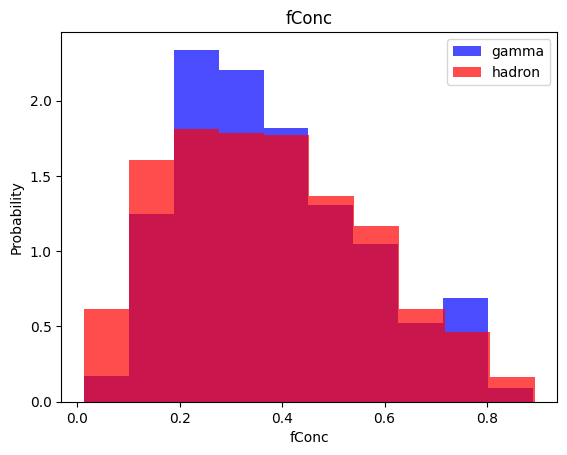

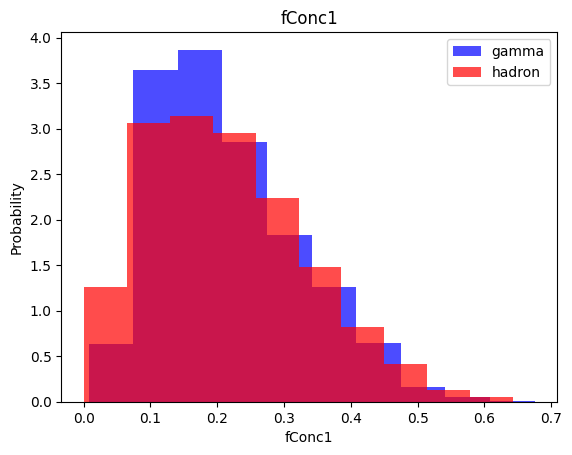

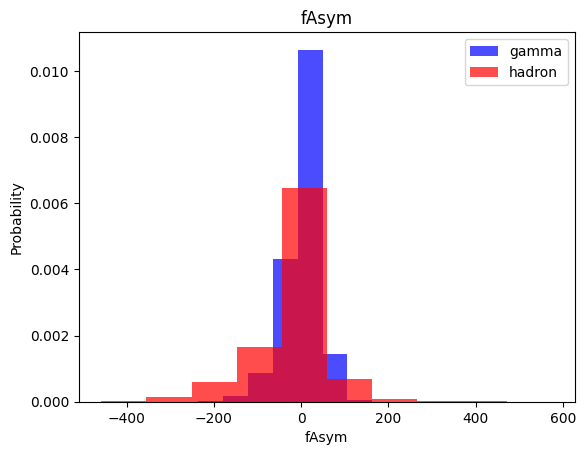

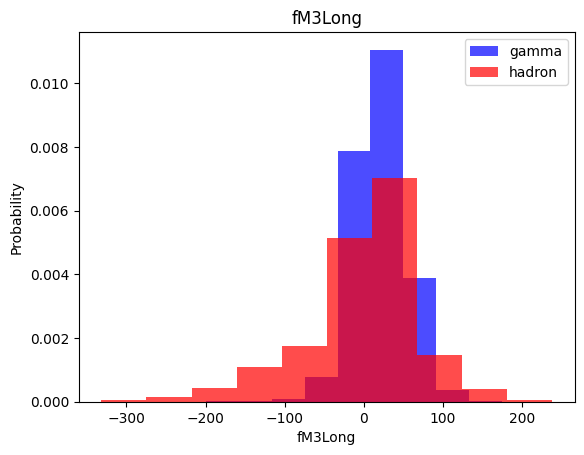

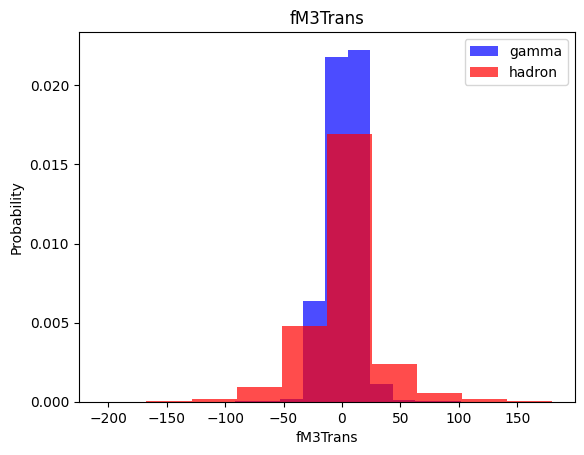

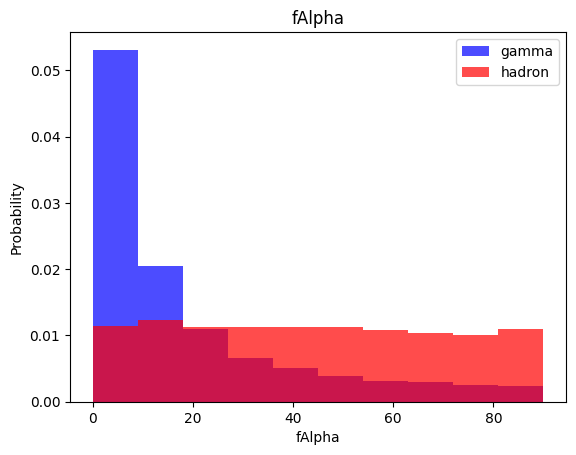

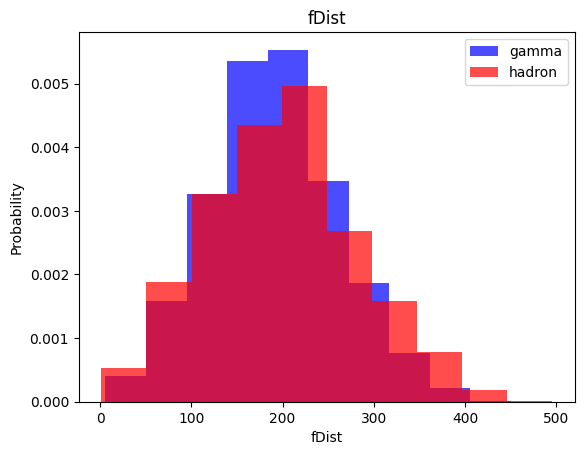

In [7]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = 'blue', label = "gamma",alpha = 0.7,density = True)
  plt.hist(df[df["class"] == 0][label], color = 'red', label = "hadron", alpha = 0.7,density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Validation and Test datasets

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

For making the features on a uniform scale

In [9]:
def scale_dataset(dataframe,oversample =False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X, y)

  #Reshaping our dataset into 2D numpy array
  data = np.hstack((X, np.reshape(y,[-1,1])))

  return data, X, y

In [10]:
#train, X_train, y_train = scale_dataset(train, oversample = True)

In [11]:
#sum(y_train == 1)

In [12]:
#sum(y_train == 0) #Evenly spread sampling

In [13]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

Now our data is properly formatted and we can move on to different models now

# kNN (k- Nearest Neighbor)

*   Label of majority which is around.
*   Define a distance function : Euclidean distance.
* K - defines that how many neighbours do we use to judge what the label is. (3 or 5)



In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
knn_model  = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn_model.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1340
           1       0.85      0.86      0.85      2464

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# NAIVE BAYES
* Conditional Probability
* Bayes rule = P(A|B) = [P(B|A).P(A)]/P(B)
* We can expand the Bayers rule and apply to classification and this is what we call NAIVE BAYES
*TERMS - Posterior, Likelihood, prior, evidence
* MAP - Maximum A Posteriori : Pick the hypothesis or K that is most probable to minimize the probability of misclassification.

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [20]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.41      0.50      1340
           1       0.73      0.89      0.80      2464

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



#LOGISTIC REGRESSION
* Basically we are trying to fit our data into sigmoid function.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [23]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1340
           1       0.85      0.82      0.83      2464

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



#SUPPORT VECTOR MACHINE
* Finding a Hyperplane that best differentiates classes.
* Something that we care about in SVM's is margin, we also care about the boundaries between data points and hyperplane.
* Data points lie at margin's line (support vectors), hence the name Support vector machine.
* Issue with SVM's is that they are not so robust with outliers. Might not be the best model when you have outliers in your dataset.

In [24]:
from sklearn.svm import SVC #support vector classifier.

In [25]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [26]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1340
           1       0.89      0.89      0.89      2464

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [27]:
import tensorflow as tf

In [28]:
#defined PLOT definitions from tensorflow tutorial.
#So we are basically plotting the plot over different 'Epochs'
#Epochs - means like training cycles.
#And then plotting the accuracy over different epochs.

def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4)) # subplots in 1 row and 2 columns.
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label = 'accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)


  plt.show()

In [34]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape =(10,)),
      tf.keras.layers.Dropout(dropout_prob), #dropout layer randomly chooses the nodes with the provided learning rate and dont train them. This actually prevents "OVERFITTING".
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                  metrics = 'accuracy')
  history = nn_model.fit(
    X_train,y_train,
    epochs = epochs,
    batch_size = batch_size,
    validation_split = 0.2, #splitting the data outside validation dataset and training our model on it by Tensorflow.
    verbose = 0 #means don't print anything
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


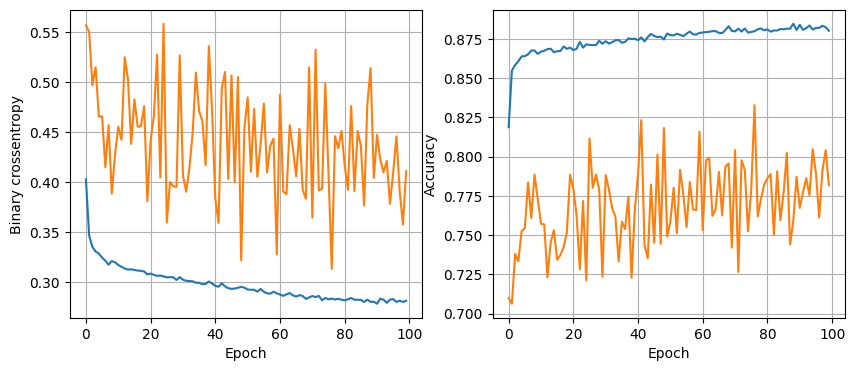

119/119 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8759
16 nodes, dropout 0, lr 0.01, batch size 64


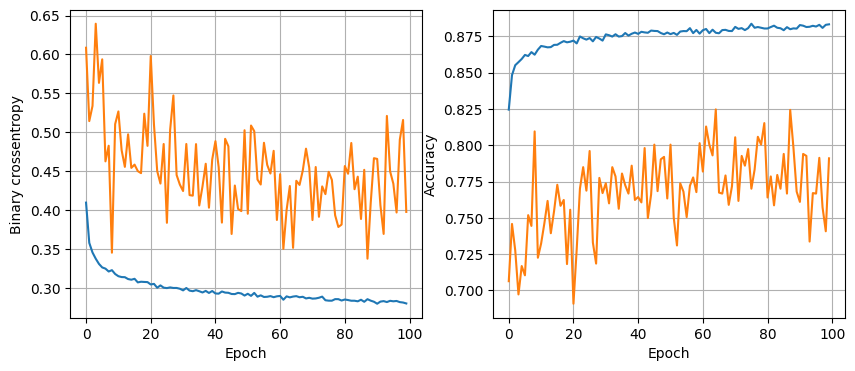

119/119 [==============================] - 0s 3ms/step - loss: 0.3080 - accuracy: 0.8762
16 nodes, dropout 0, lr 0.01, batch size 128


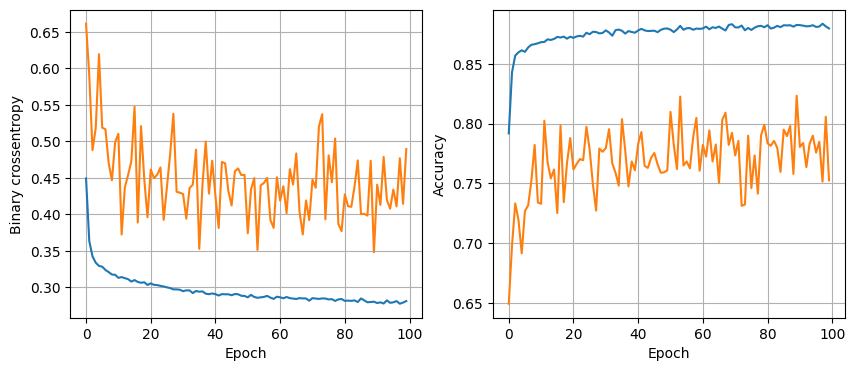

119/119 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8707
16 nodes, dropout 0, lr 0.005, batch size 32


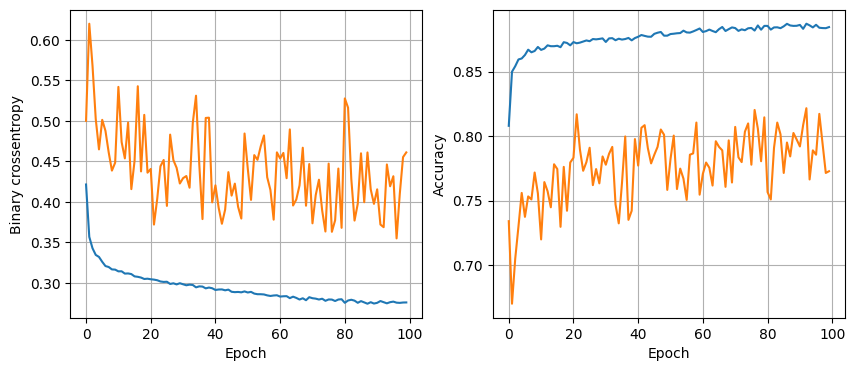

119/119 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8741
16 nodes, dropout 0, lr 0.005, batch size 64


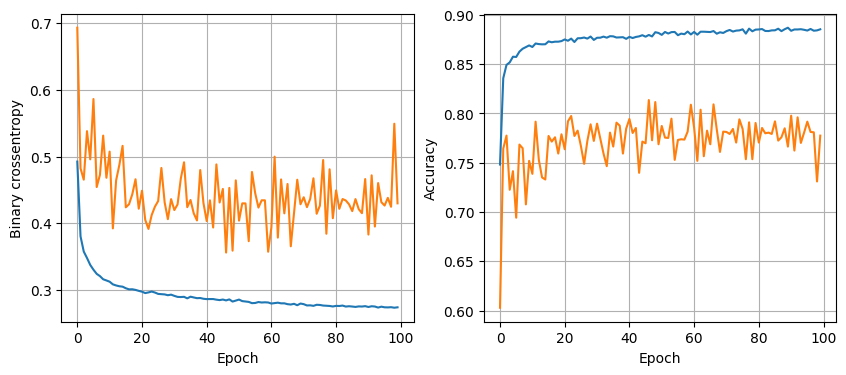

119/119 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8757
16 nodes, dropout 0, lr 0.005, batch size 128


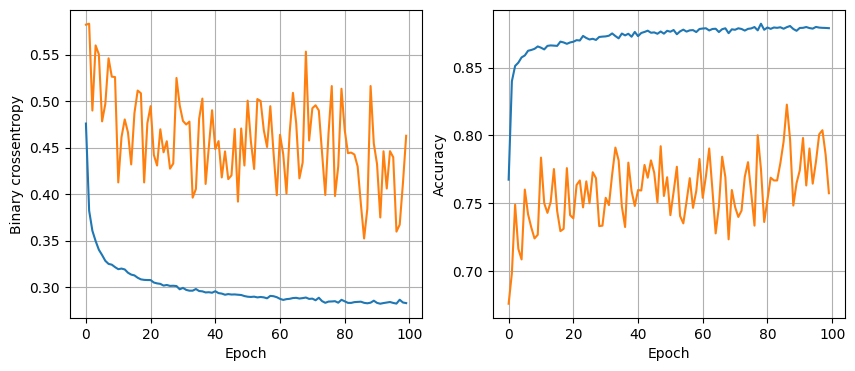

119/119 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8683
16 nodes, dropout 0, lr 0.001, batch size 32


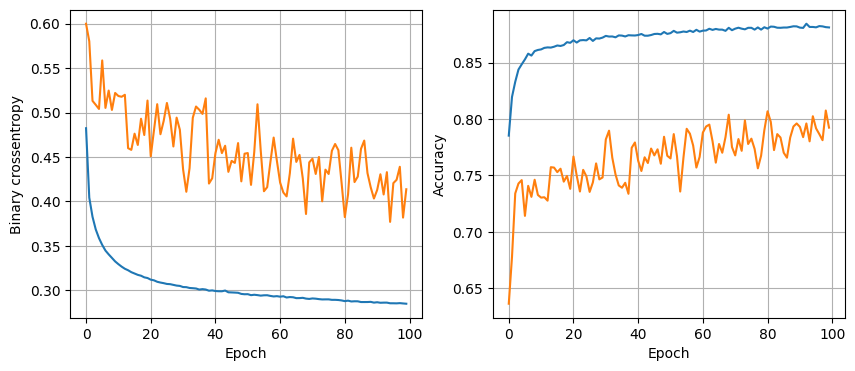

119/119 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8717
16 nodes, dropout 0, lr 0.001, batch size 64


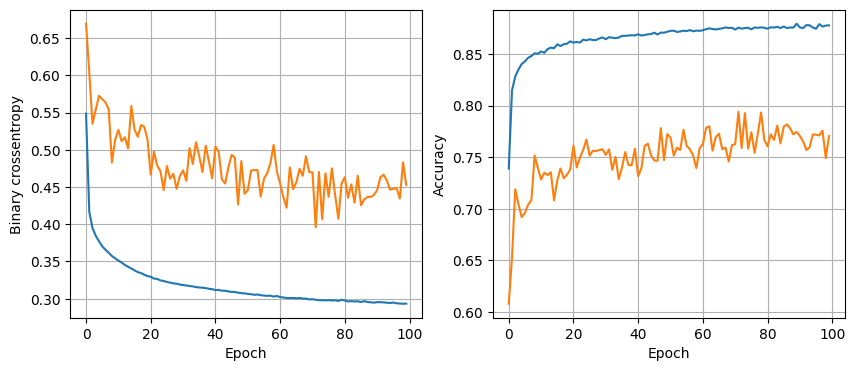

119/119 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8683
16 nodes, dropout 0, lr 0.001, batch size 128


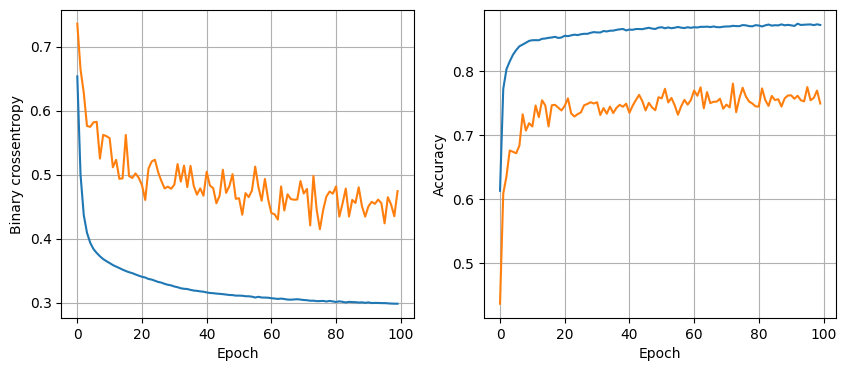

119/119 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8675
16 nodes, dropout 0.2, lr 0.01, batch size 32


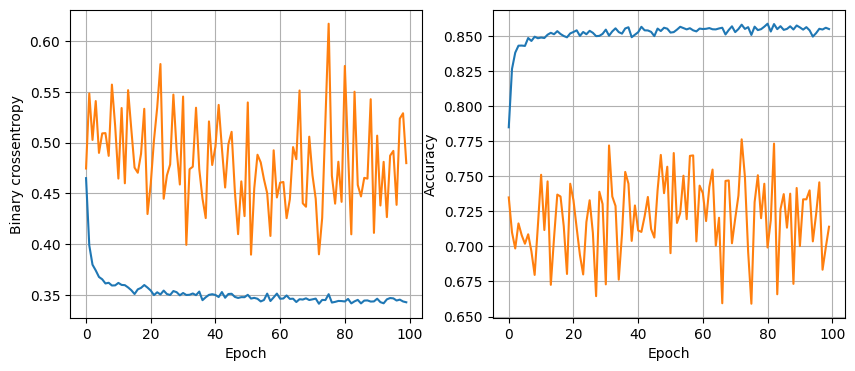

119/119 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8693
16 nodes, dropout 0.2, lr 0.01, batch size 64


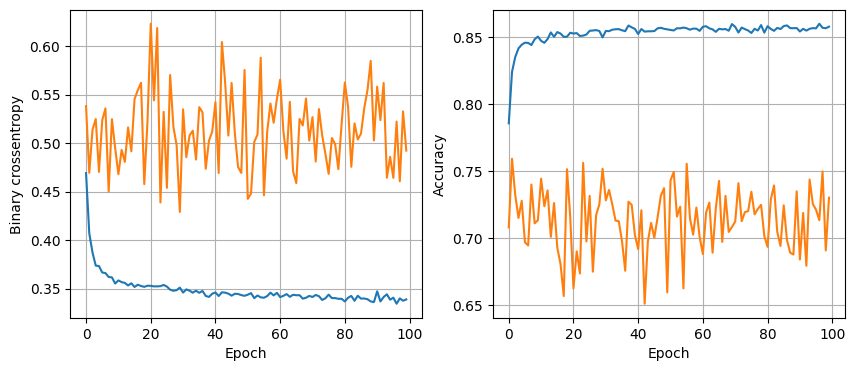

119/119 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8712
16 nodes, dropout 0.2, lr 0.01, batch size 128


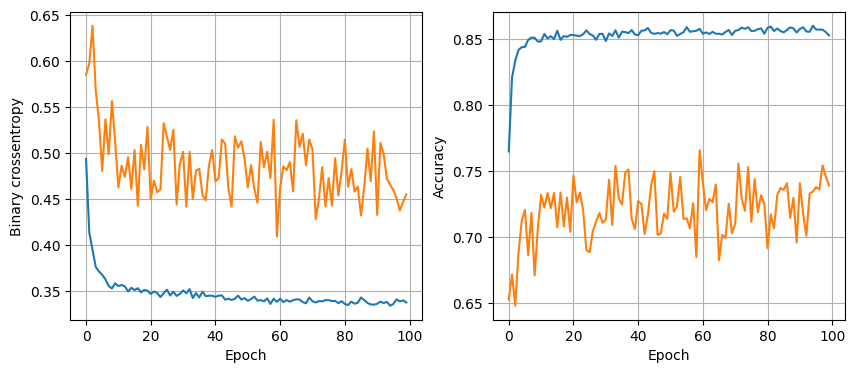

119/119 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8620
16 nodes, dropout 0.2, lr 0.005, batch size 32


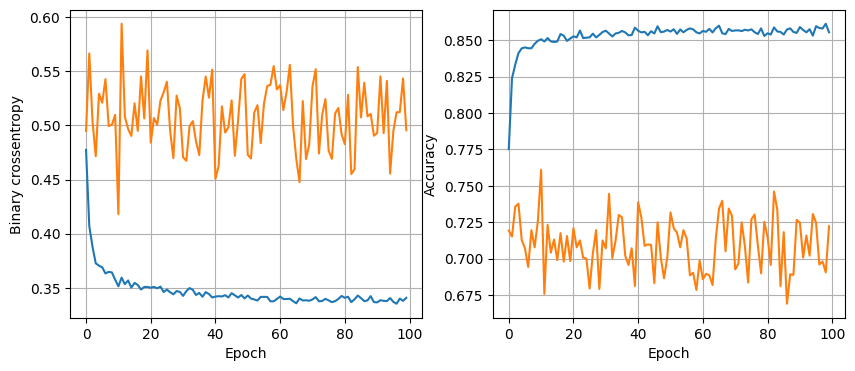

119/119 [==============================] - 1s 8ms/step - loss: 0.3142 - accuracy: 0.8709
16 nodes, dropout 0.2, lr 0.005, batch size 64


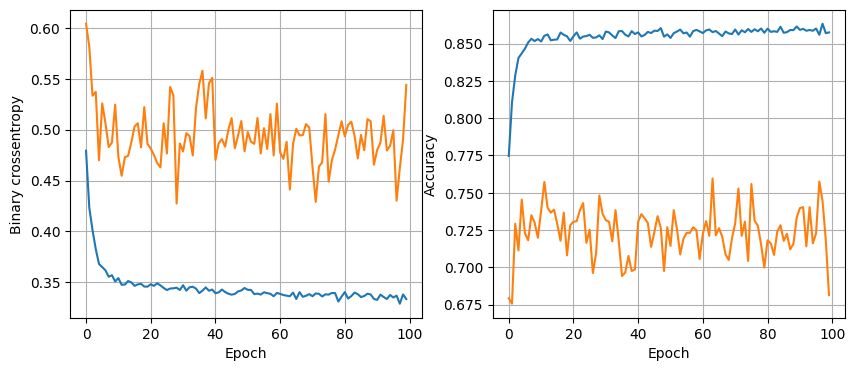

119/119 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8654
16 nodes, dropout 0.2, lr 0.005, batch size 128


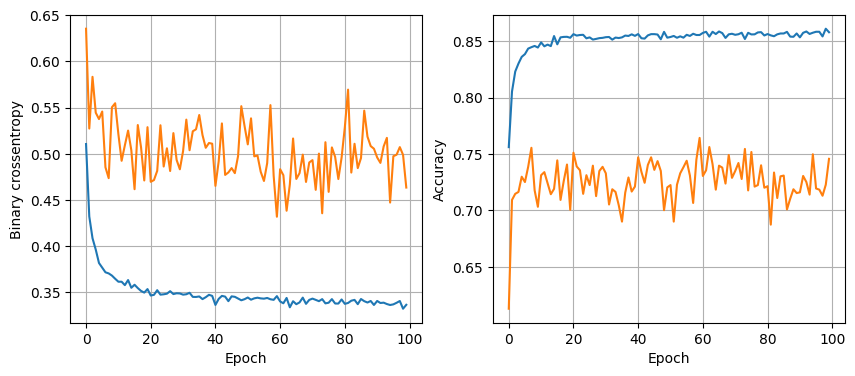

119/119 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.8712
16 nodes, dropout 0.2, lr 0.001, batch size 32


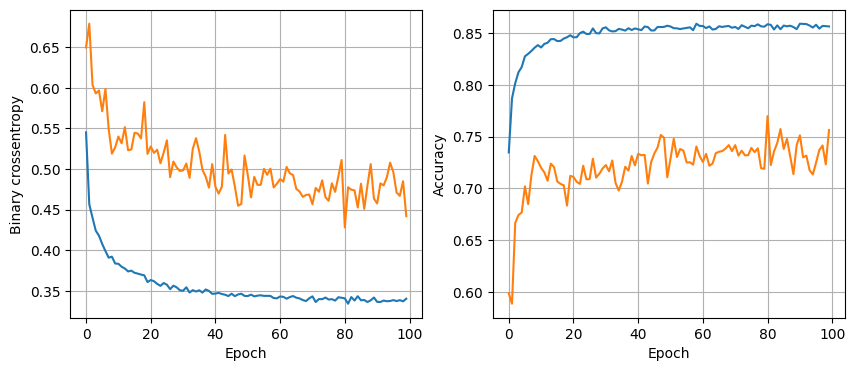

119/119 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8722
16 nodes, dropout 0.2, lr 0.001, batch size 64


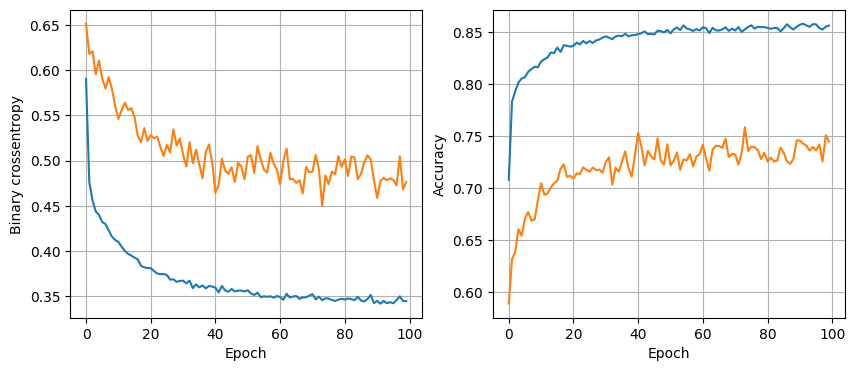

119/119 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8712
16 nodes, dropout 0.2, lr 0.001, batch size 128


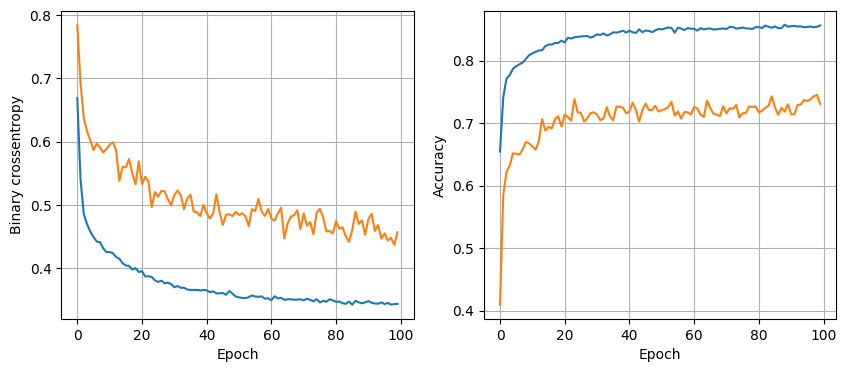

119/119 [==============================] - 1s 10ms/step - loss: 0.3171 - accuracy: 0.8715
32 nodes, dropout 0, lr 0.01, batch size 32


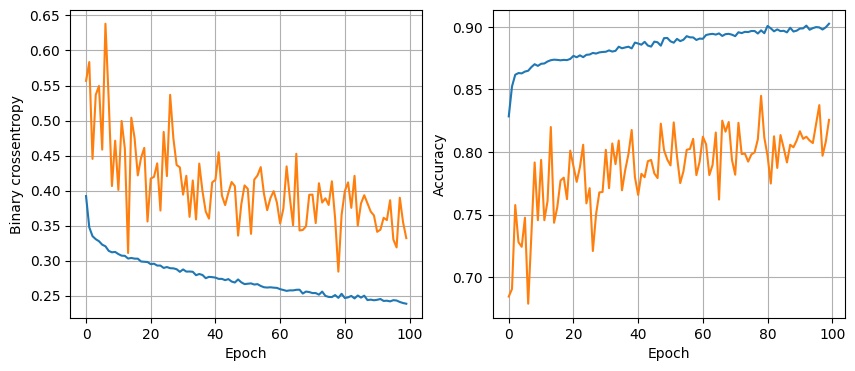

119/119 [==============================] - 0s 3ms/step - loss: 0.3676 - accuracy: 0.8762
32 nodes, dropout 0, lr 0.01, batch size 64


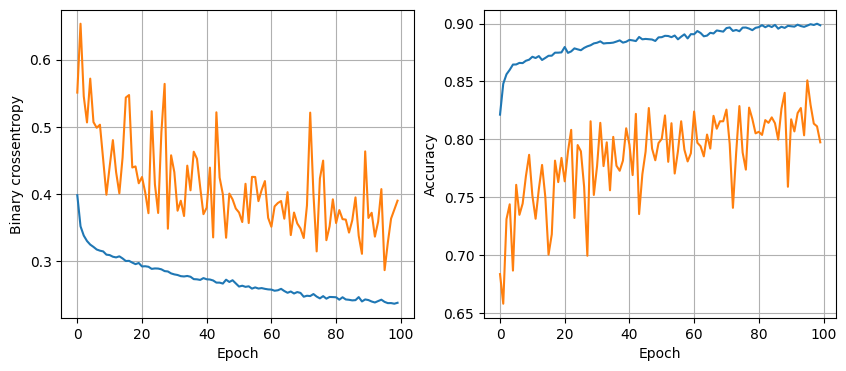

119/119 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8707
32 nodes, dropout 0, lr 0.01, batch size 128


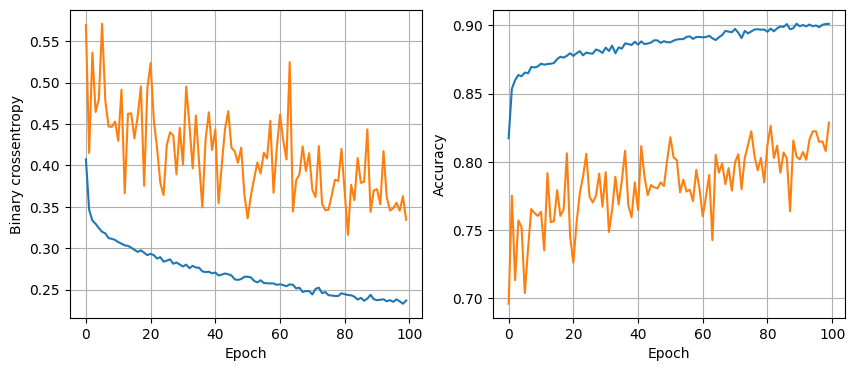

119/119 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.005, batch size 32


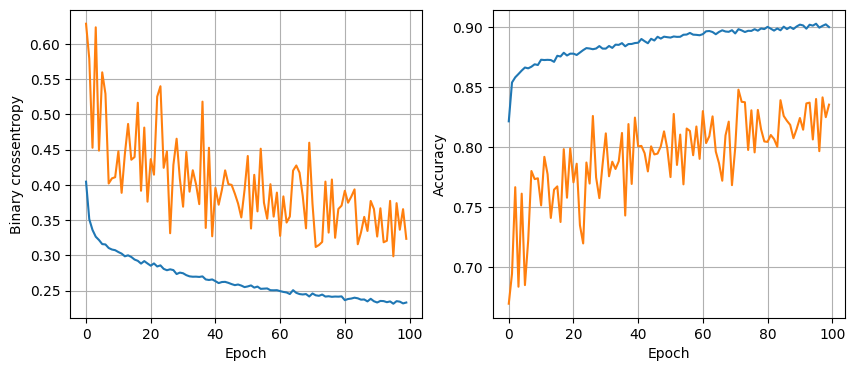

119/119 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8665
32 nodes, dropout 0, lr 0.005, batch size 64


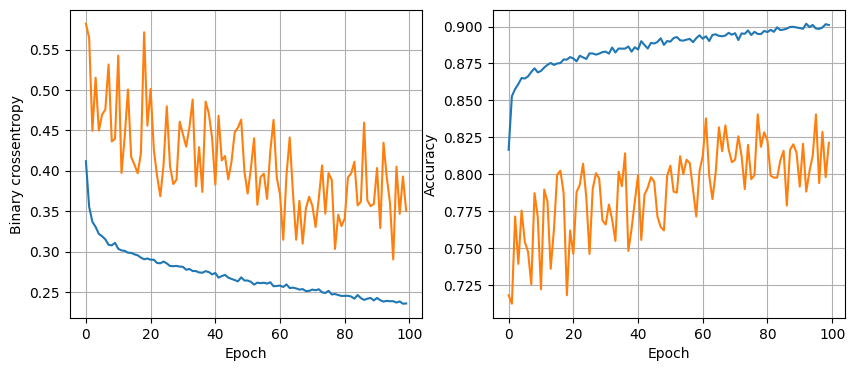

119/119 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8680
32 nodes, dropout 0, lr 0.005, batch size 128


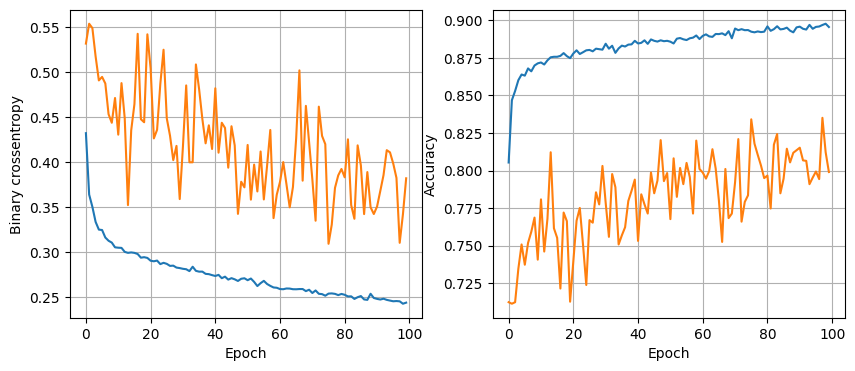

119/119 [==============================] - 1s 4ms/step - loss: 0.3300 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.001, batch size 32


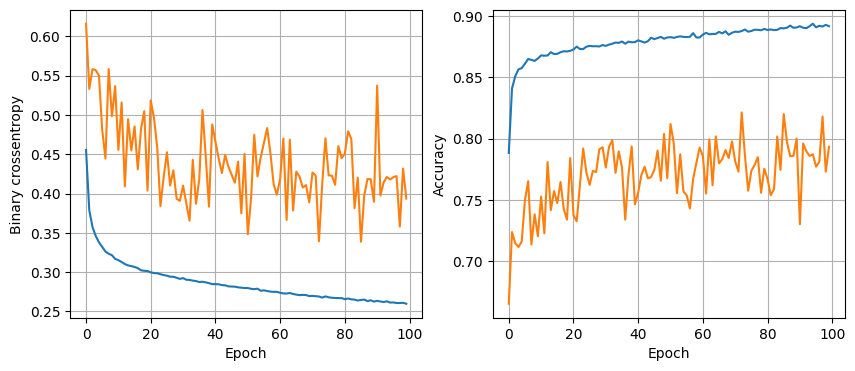

119/119 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 0.8709
32 nodes, dropout 0, lr 0.001, batch size 64


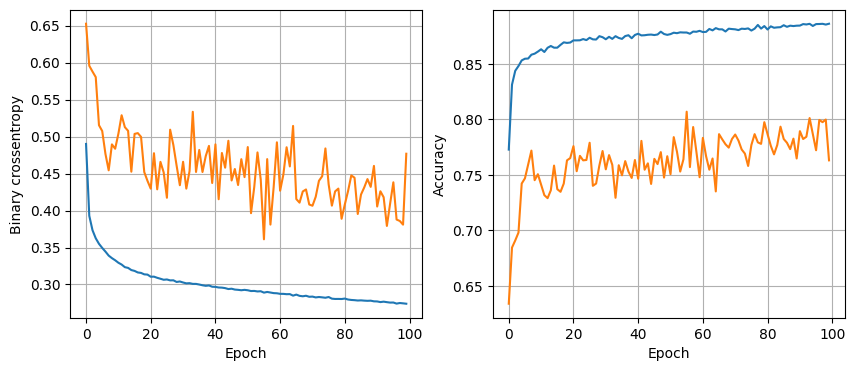

119/119 [==============================] - 1s 5ms/step - loss: 0.3115 - accuracy: 0.8741
32 nodes, dropout 0, lr 0.001, batch size 128


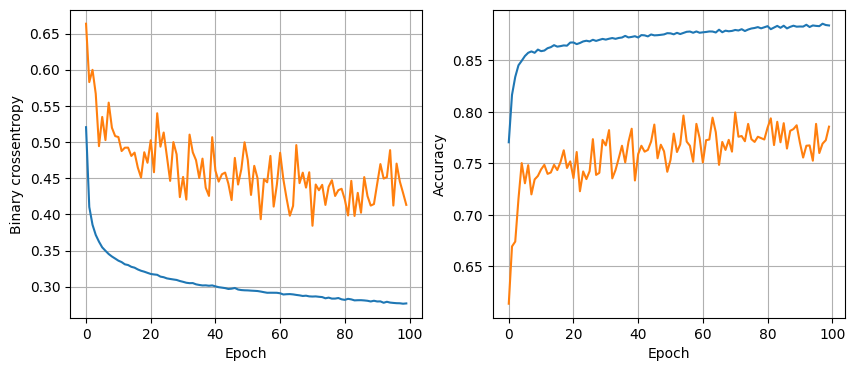

119/119 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.8701
32 nodes, dropout 0.2, lr 0.01, batch size 32


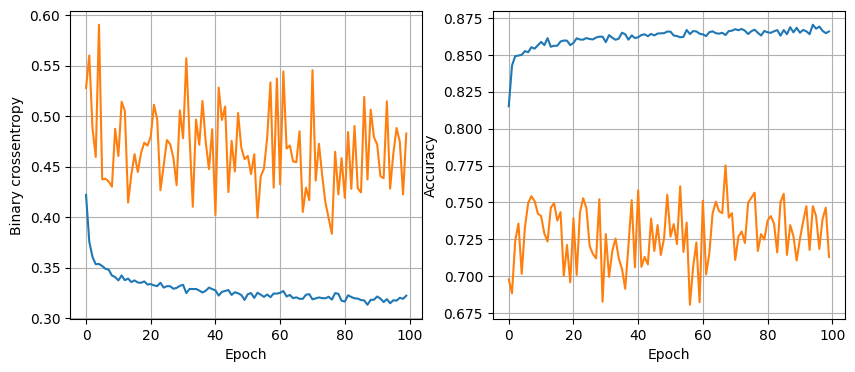

119/119 [==============================] - 0s 4ms/step - loss: 0.3081 - accuracy: 0.8741
32 nodes, dropout 0.2, lr 0.01, batch size 64


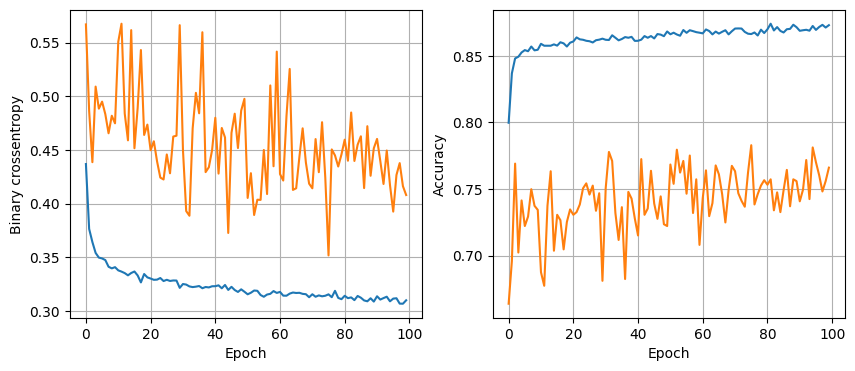

119/119 [==============================] - 0s 3ms/step - loss: 0.3017 - accuracy: 0.8820
32 nodes, dropout 0.2, lr 0.01, batch size 128


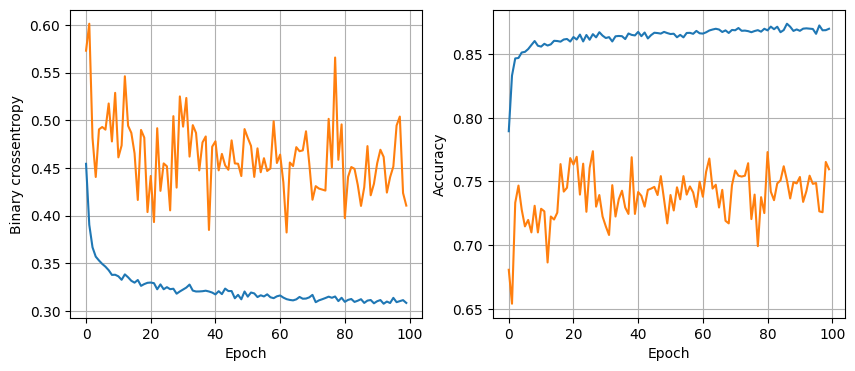

119/119 [==============================] - 0s 4ms/step - loss: 0.3043 - accuracy: 0.8749
32 nodes, dropout 0.2, lr 0.005, batch size 32


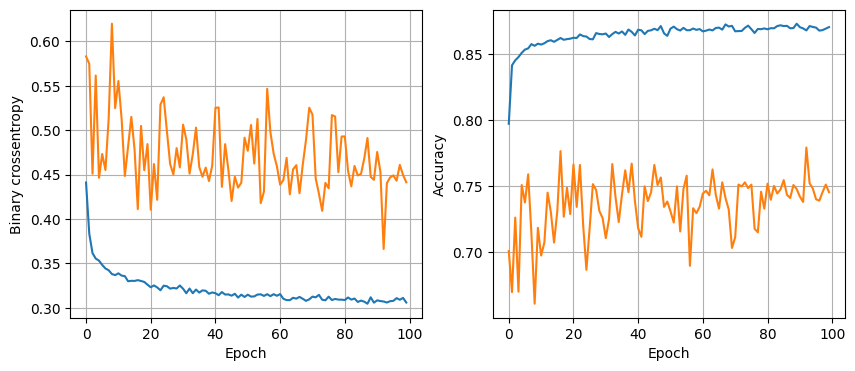

119/119 [==============================] - 0s 3ms/step - loss: 0.3020 - accuracy: 0.8809
32 nodes, dropout 0.2, lr 0.005, batch size 64


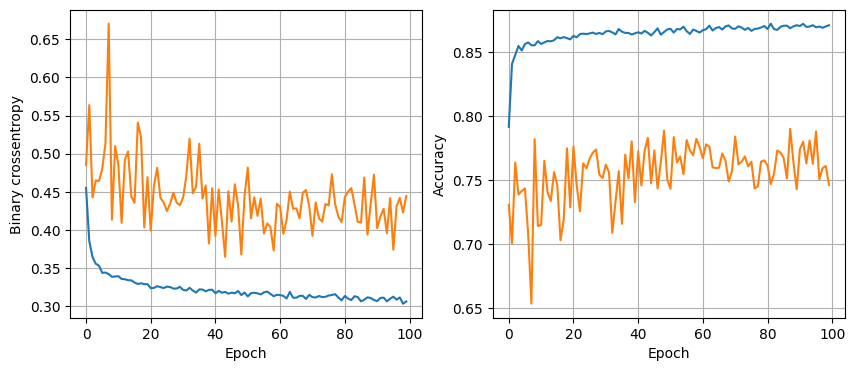

119/119 [==============================] - 1s 4ms/step - loss: 0.3064 - accuracy: 0.8730
32 nodes, dropout 0.2, lr 0.005, batch size 128


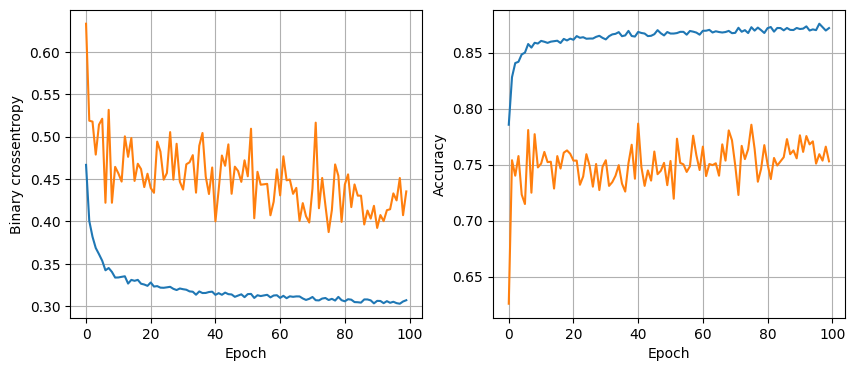

119/119 [==============================] - 0s 3ms/step - loss: 0.3016 - accuracy: 0.8812
32 nodes, dropout 0.2, lr 0.001, batch size 32


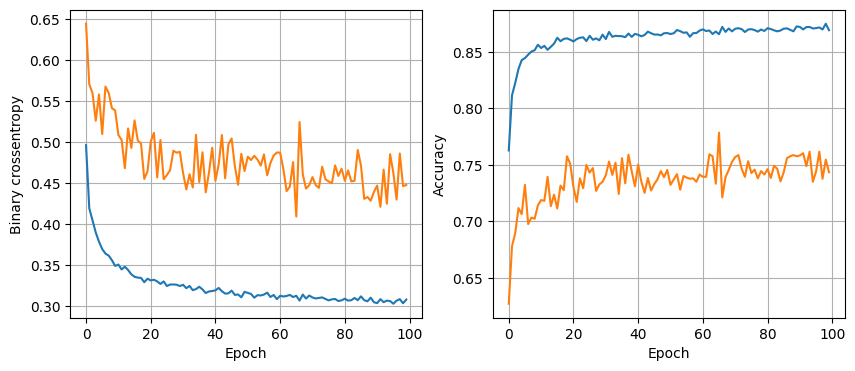

119/119 [==============================] - 0s 3ms/step - loss: 0.3024 - accuracy: 0.8793
32 nodes, dropout 0.2, lr 0.001, batch size 64


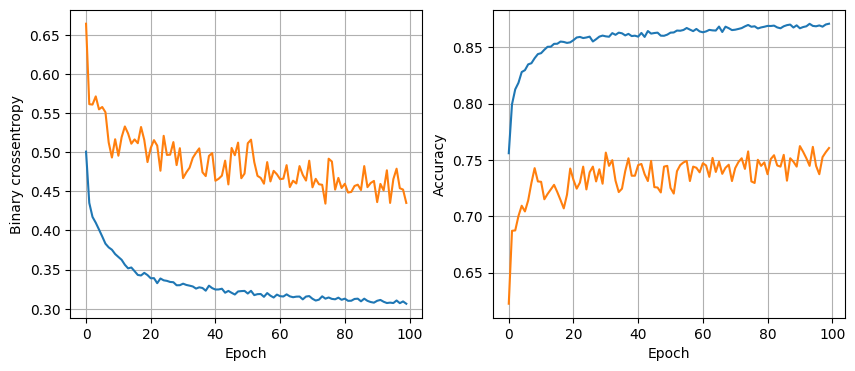

119/119 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8770
32 nodes, dropout 0.2, lr 0.001, batch size 128


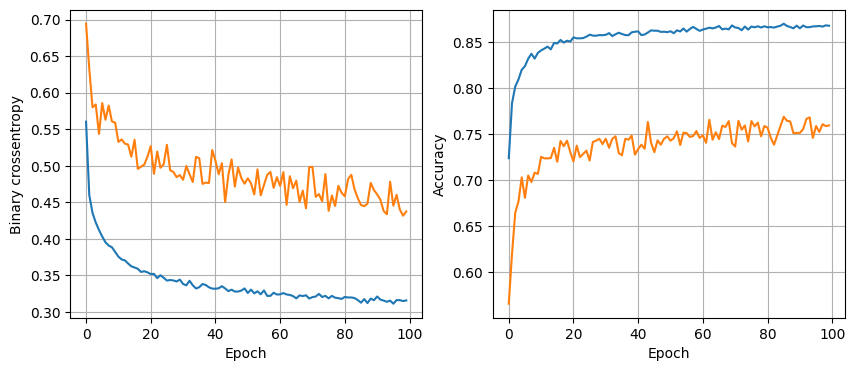

119/119 [==============================] - 0s 2ms/step - loss: 0.3024 - accuracy: 0.8746
64 nodes, dropout 0, lr 0.01, batch size 32


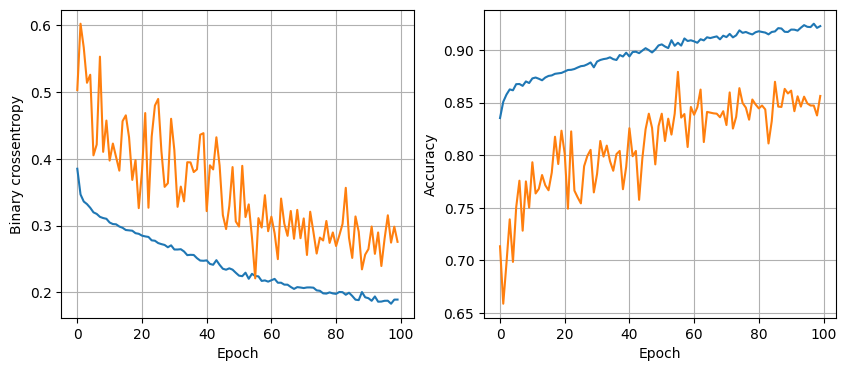

119/119 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.8651
64 nodes, dropout 0, lr 0.01, batch size 64


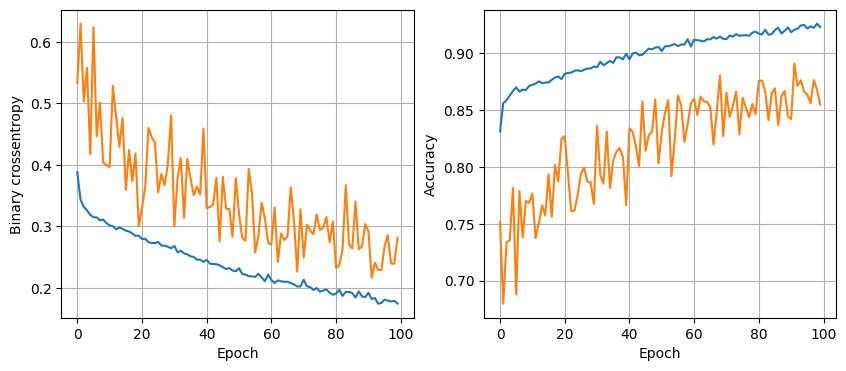

119/119 [==============================] - 0s 3ms/step - loss: 0.5202 - accuracy: 0.8615
64 nodes, dropout 0, lr 0.01, batch size 128


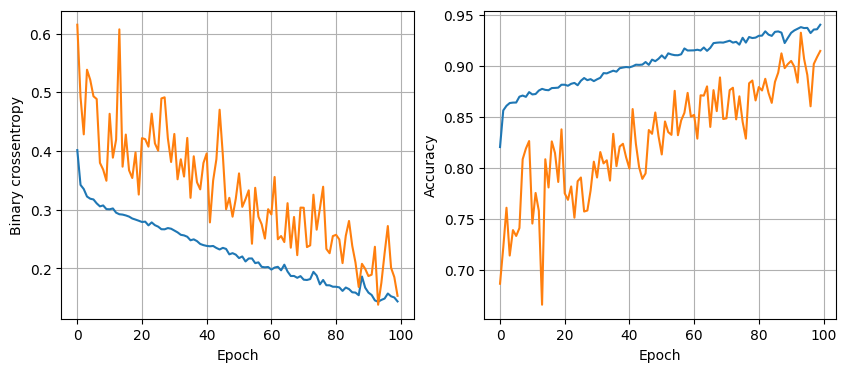

119/119 [==============================] - 1s 4ms/step - loss: 0.5804 - accuracy: 0.8452
64 nodes, dropout 0, lr 0.005, batch size 32


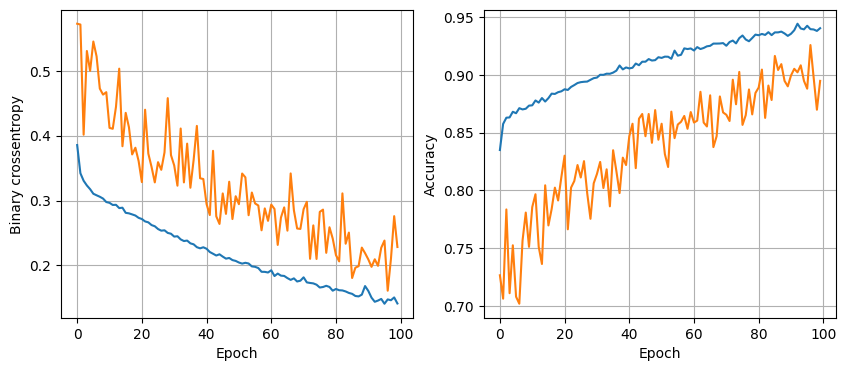

119/119 [==============================] - 0s 3ms/step - loss: 0.5898 - accuracy: 0.8607
64 nodes, dropout 0, lr 0.005, batch size 64


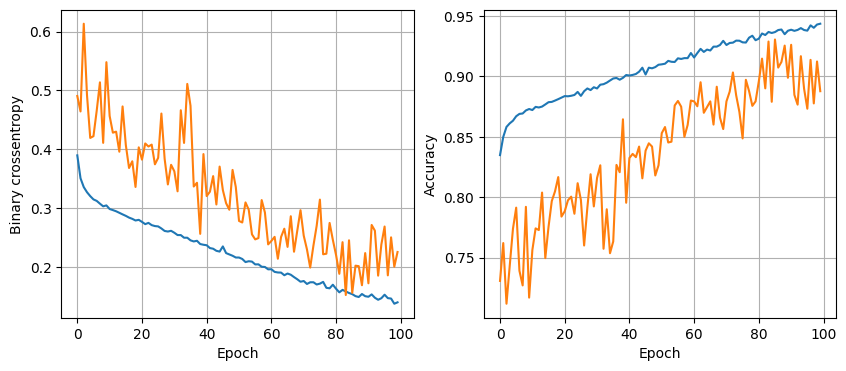

119/119 [==============================] - 0s 3ms/step - loss: 0.5462 - accuracy: 0.8525
64 nodes, dropout 0, lr 0.005, batch size 128


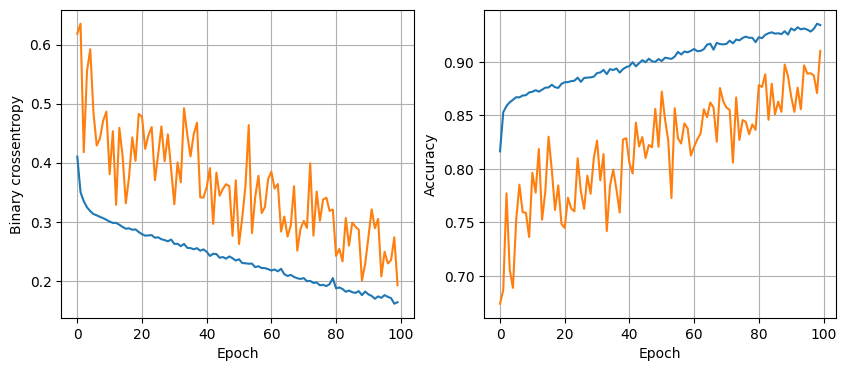

119/119 [==============================] - 0s 3ms/step - loss: 0.4284 - accuracy: 0.8672
64 nodes, dropout 0, lr 0.001, batch size 32


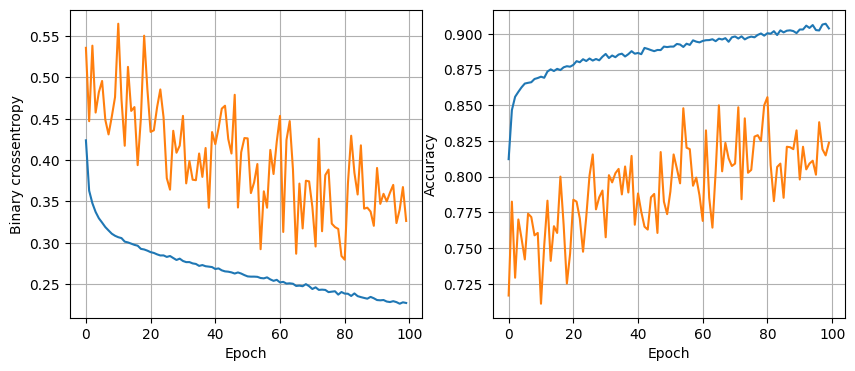

119/119 [==============================] - 0s 4ms/step - loss: 0.3392 - accuracy: 0.8659
64 nodes, dropout 0, lr 0.001, batch size 64


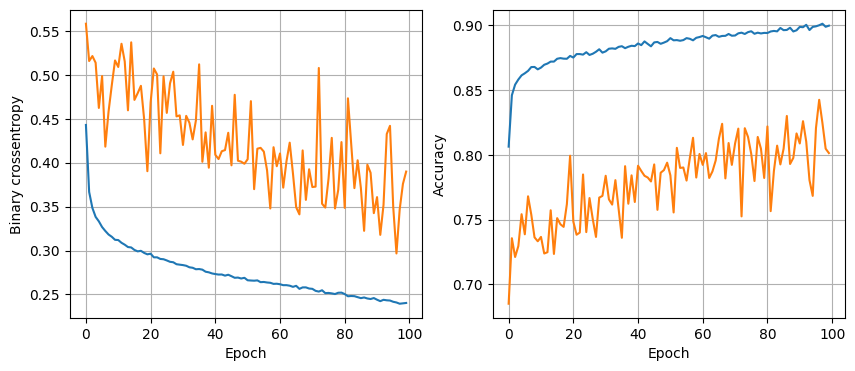

119/119 [==============================] - 1s 4ms/step - loss: 0.3227 - accuracy: 0.8743
64 nodes, dropout 0, lr 0.001, batch size 128


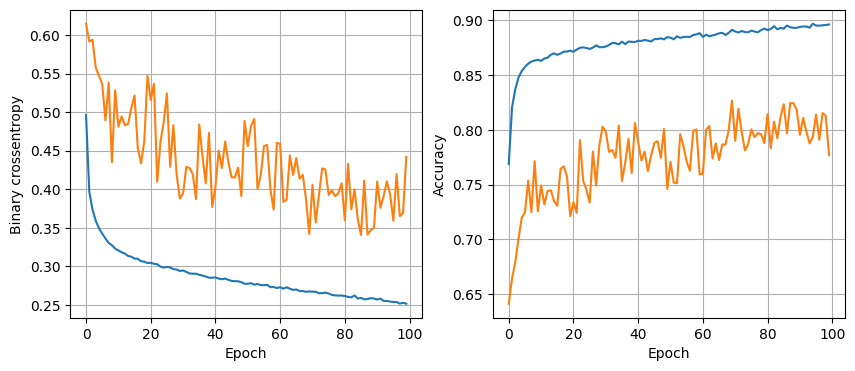

119/119 [==============================] - 0s 3ms/step - loss: 0.3220 - accuracy: 0.8670
64 nodes, dropout 0.2, lr 0.01, batch size 32


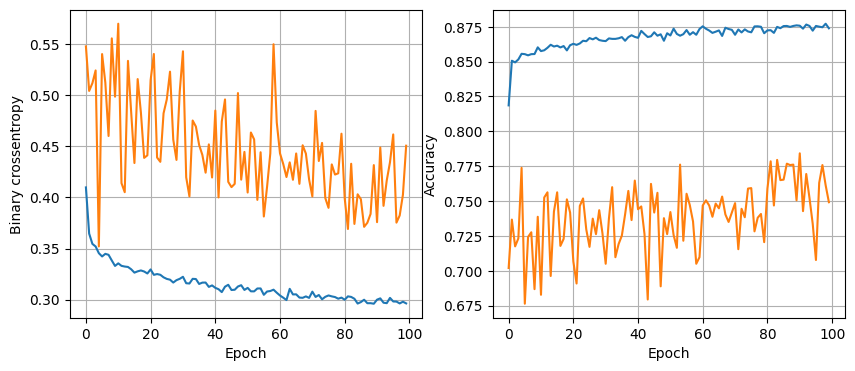

119/119 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.8730
64 nodes, dropout 0.2, lr 0.01, batch size 64


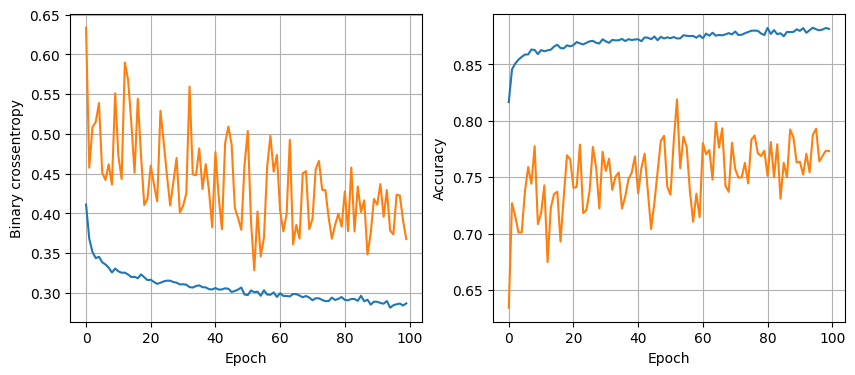

119/119 [==============================] - 0s 3ms/step - loss: 0.2942 - accuracy: 0.8778
64 nodes, dropout 0.2, lr 0.01, batch size 128


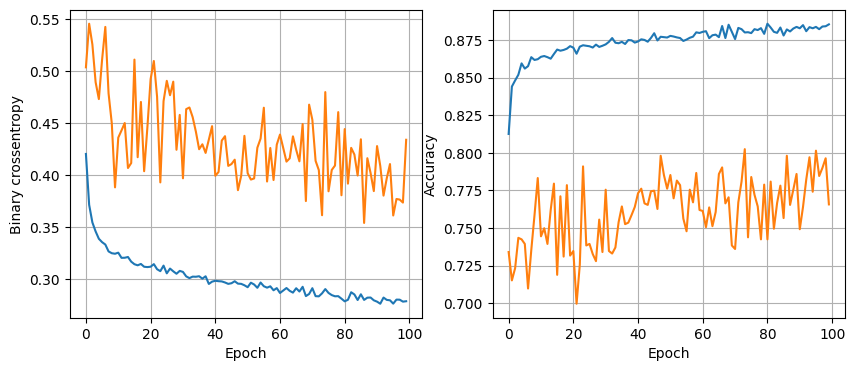

119/119 [==============================] - 0s 3ms/step - loss: 0.3035 - accuracy: 0.8741
64 nodes, dropout 0.2, lr 0.005, batch size 32


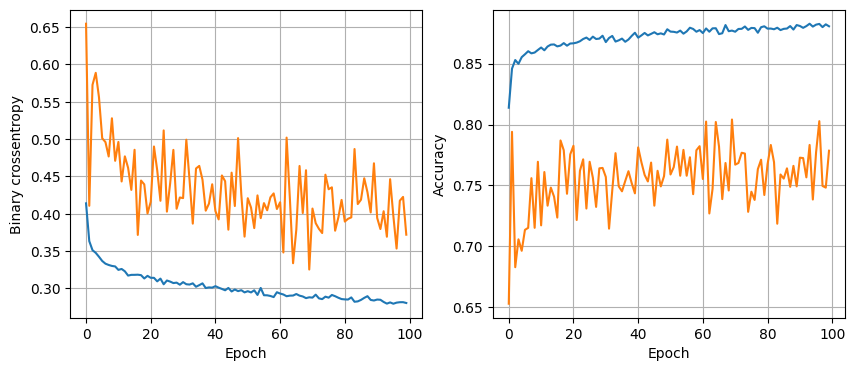

119/119 [==============================] - 0s 3ms/step - loss: 0.3033 - accuracy: 0.8749
64 nodes, dropout 0.2, lr 0.005, batch size 64


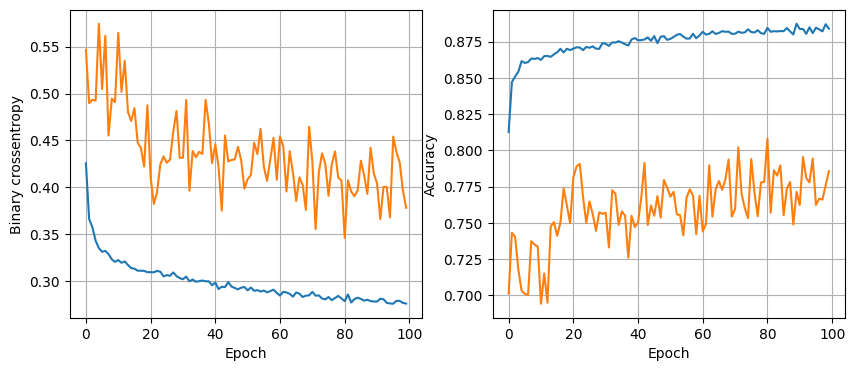

119/119 [==============================] - 0s 3ms/step - loss: 0.3052 - accuracy: 0.8770
64 nodes, dropout 0.2, lr 0.005, batch size 128


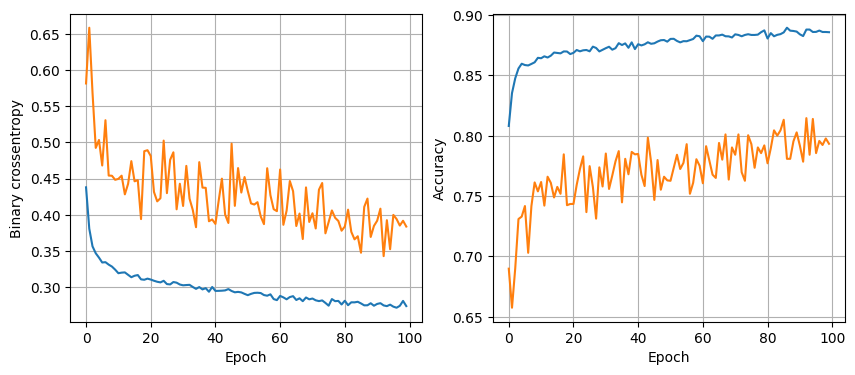

119/119 [==============================] - 0s 3ms/step - loss: 0.2982 - accuracy: 0.8785
64 nodes, dropout 0.2, lr 0.001, batch size 32


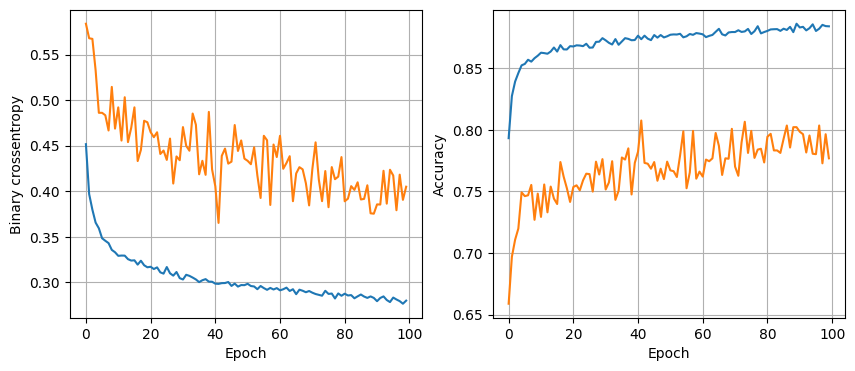

119/119 [==============================] - 0s 3ms/step - loss: 0.3026 - accuracy: 0.8804
64 nodes, dropout 0.2, lr 0.001, batch size 64


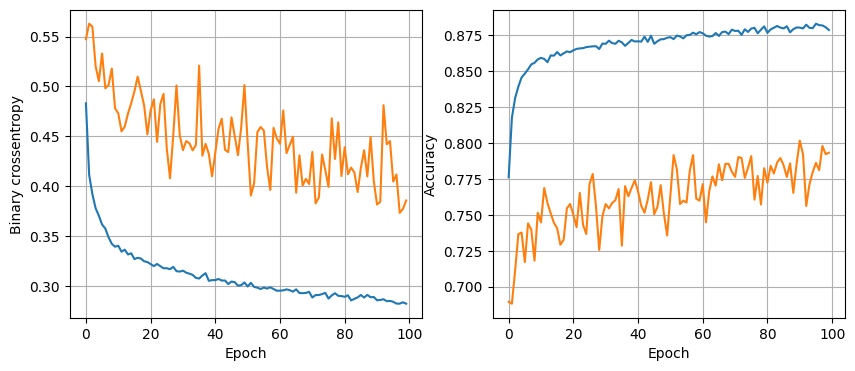

119/119 [==============================] - 0s 3ms/step - loss: 0.2986 - accuracy: 0.8775
64 nodes, dropout 0.2, lr 0.001, batch size 128


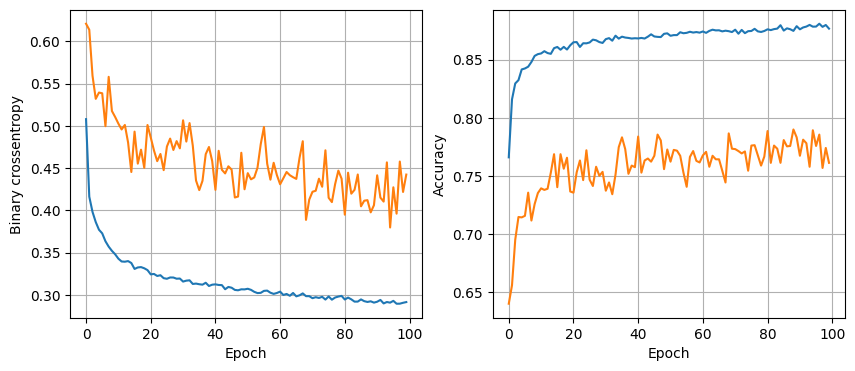

119/119 [==============================] - 0s 3ms/step - loss: 0.2971 - accuracy: 0.8788


In [35]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        #model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [38]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 0s 4ms/step


array([1, 1, 0, ..., 0, 1, 1])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1340
           1       0.87      0.95      0.91      2464

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

